## Interpretabilidad de modelos con SHAP

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')


In [2]:
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]

X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

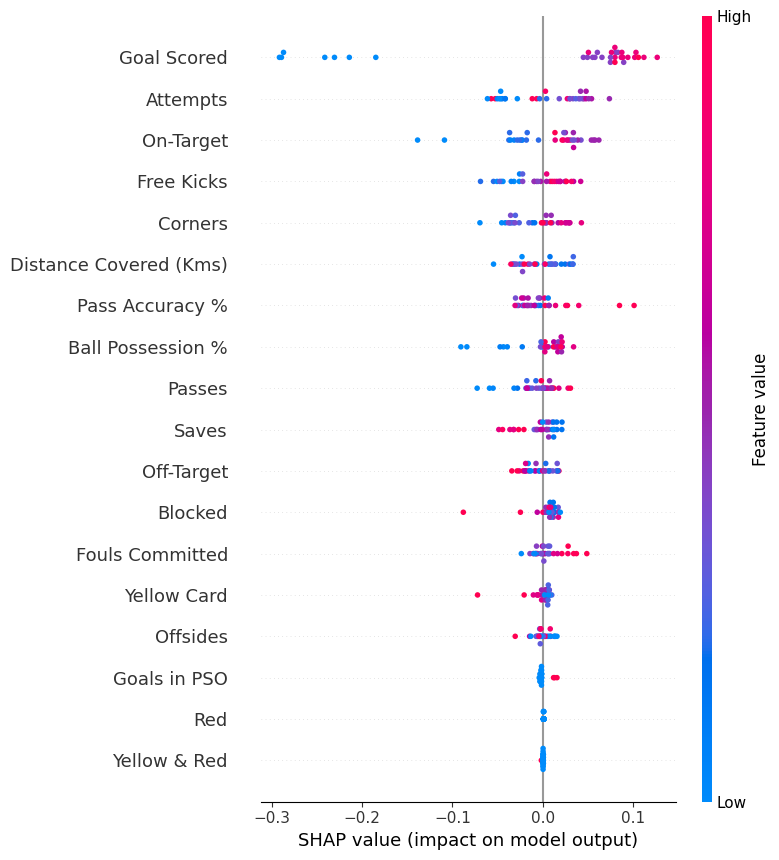

In [3]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

In [5]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.29, 0.71]])

In [6]:
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction_array)

In [7]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array)